<a class="anchor" id="0"></a>

# **Positive COVID-19 Cases in Canada: Linear Regression**

**Author:** Stephen Prudente  
**Date:** April 4th, 2022

**Purpose:** This workbook looks to test the relationship of the datasets independent variable and dependent variable.

**Canada Dataset:** This dataset was published by the Public Health Agency of Canada on March 26th, 2020 and is maintained and updated daily by the publisher. It contains the number of individuals tested, positive cases, deaths, and cases recovered per each province from March 31st, 2020 to present time.
https://open.canada.ca/data/en/dataset/b8d1d622-1ceb-4c1c-96e9-a0b38939080b

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from warnings import simplefilter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Read Data

In [1]:
df_whole = pd.read_csv(
    "https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv",
    index_col='date',
    parse_dates=['date'],
)

df = df_whole[df_whole['prname'].str.contains('Canada')]
df = df[['numconf','numtotal','numrecover','avgtotal_last7','numtotal_last7','numtotal_last14','numtests','numdeaths','ratetests','numactive','numtoday','numteststoday','numrecoveredtoday']]

df.head()

,numconf,numtotal,numrecover,avgtotal_last7,numtotal_last7,numtotal_last14,numtests,numdeaths,ratetests,numactive,numtoday,numteststoday,numrecoveredtoday
date,,,,,,,,,,,,,
2020-01-31,4,4,0,0.00,0,0,0,0,0.00,4,0,0,0
2020-02-08,7,7,0,0.43,3,3,63,0,1.65,7,3,63,0
2020-02-16,8,8,0,0.57,4,4,109,0,2.85,8,1,46,0
2020-02-21,9,9,0,0.71,5,5,166,0,4.34,9,1,57,0
2020-02-24,10,10,0,0.86,6,6,212,0,5.54,10,1,46,0


## Time-Step Features

In [2]:
df['Time'] = np.arange(len(df.index))

df.head()

,numconf,numtotal,numrecover,avgtotal_last7,numtotal_last7,numtotal_last14,numtests,numdeaths,ratetests,numactive,numtoday,numteststoday,numrecoveredtoday,Time
date,,,,,,,,,,,,,,
2020-01-31,4,4,0,0.00,0,0,0,0,0.00,4,0,0,0,0
2020-02-08,7,7,0,0.43,3,3,63,0,1.65,7,3,63,0,1
2020-02-16,8,8,0,0.57,4,4,109,0,2.85,8,1,46,0,2
2020-02-21,9,9,0,0.71,5,5,166,0,4.34,9,1,57,0,3
2020-02-24,10,10,0,0.86,6,6,212,0,5.54,10,1,46,0,4


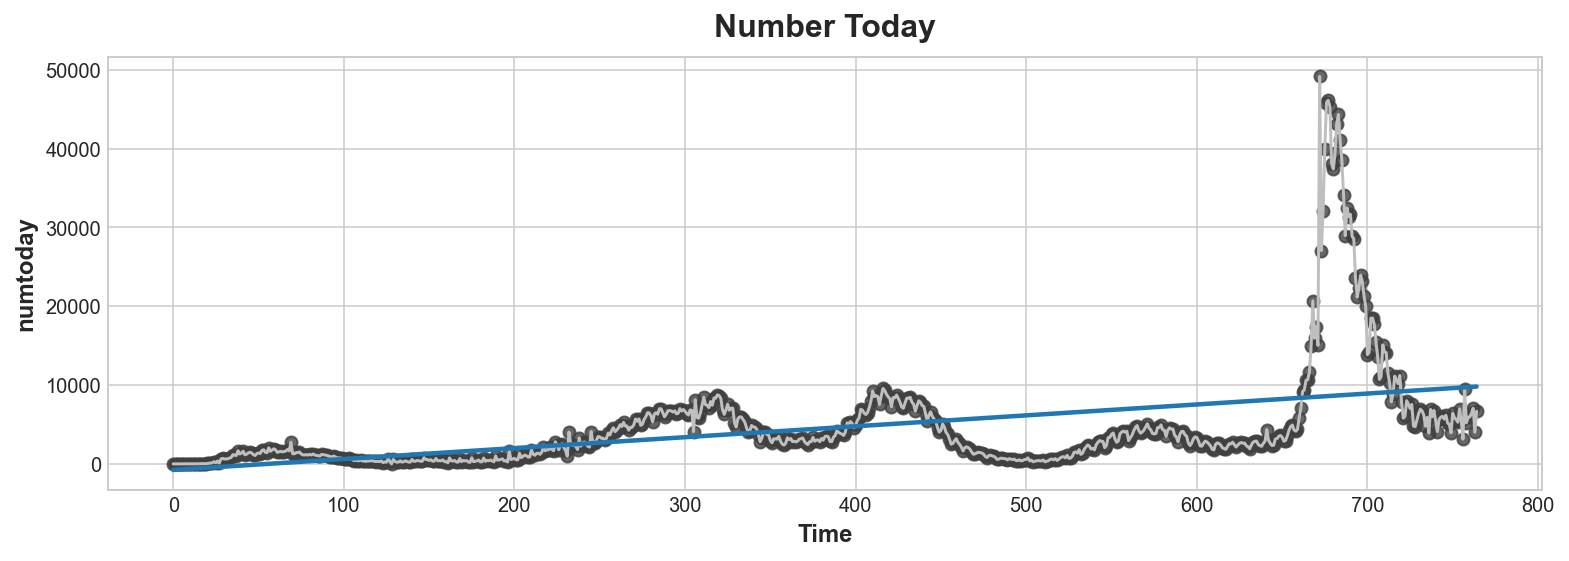

In [3]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'numtoday', data=df, color='0.75')
ax = sns.regplot(x='Time', y='numtoday', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Number Today');

## Lag Features

In [4]:
df['Lag_1'] = df['numtoday'].shift(1)
df2 = df.reindex(columns=['numtoday', 'Lag_1'])

df2.head()

,numtoday,Lag_1
date,,
2020-01-31,0,NaN
2020-02-08,3,0.0
2020-02-16,1,3.0
2020-02-21,1,1.0
2020-02-24,1,1.0


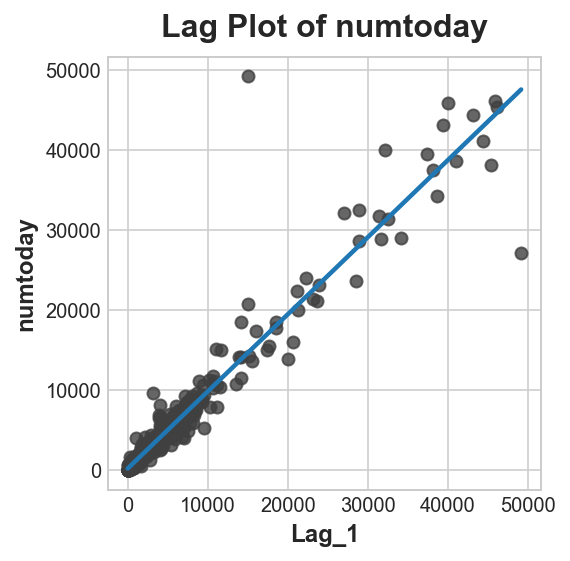

In [5]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='numtoday', data=df2, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of numtoday');

In [6]:


simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [7]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'numtoday']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

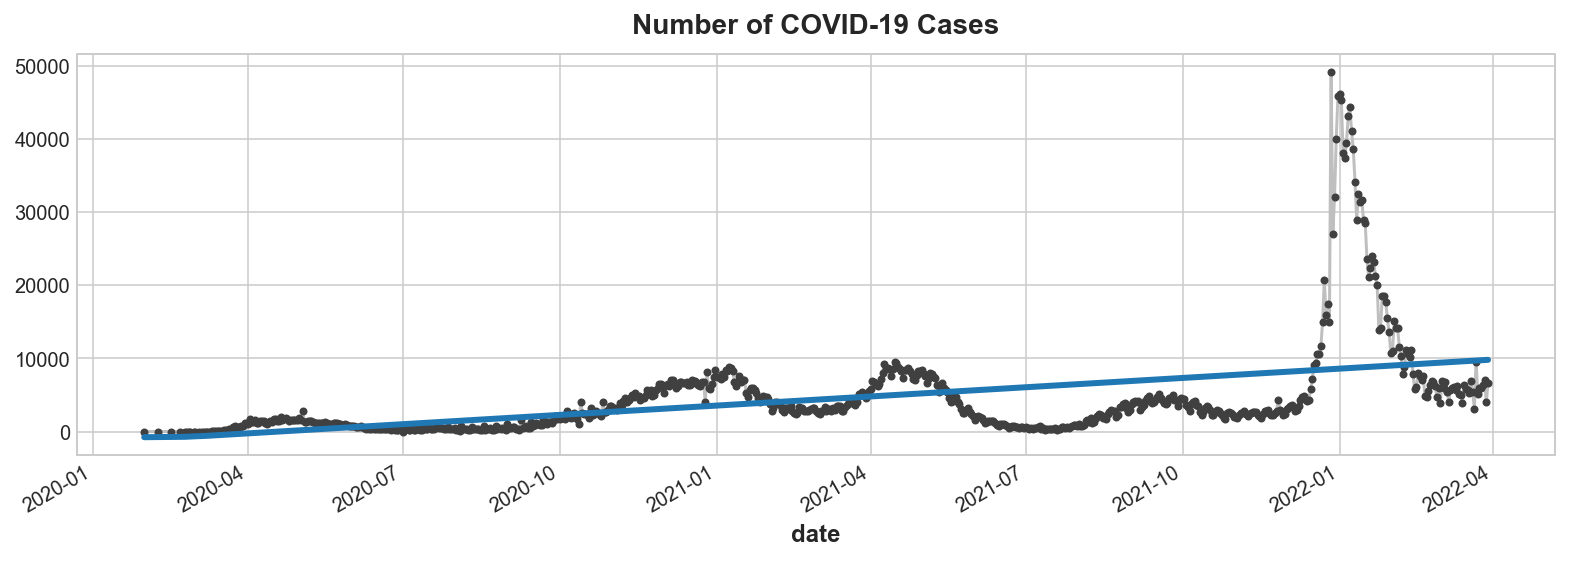

In [8]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Number of COVID-19 Cases');

In [9]:
df['Lag_1'] = df['numtoday'].shift(1)
df.head()

,numconf,numtotal,numrecover,avgtotal_last7,numtotal_last7,numtotal_last14,numtests,numdeaths,ratetests,numactive,numtoday,numteststoday,numrecoveredtoday,Time,Lag_1
date,,,,,,,,,,,,,,,
2020-01-31,4,4,0,0.00,0,0,0,0,0.00,4,0,0,0,0,NaN
2020-02-08,7,7,0,0.43,3,3,63,0,1.65,7,3,63,0,1,0.0
2020-02-16,8,8,0,0.57,4,4,109,0,2.85,8,1,46,0,2,3.0
2020-02-21,9,9,0,0.71,5,5,166,0,4.34,9,1,57,0,3,1.0
2020-02-24,10,10,0,0.86,6,6,212,0,5.54,10,1,46,0,4,1.0


In [10]:

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'numtoday']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

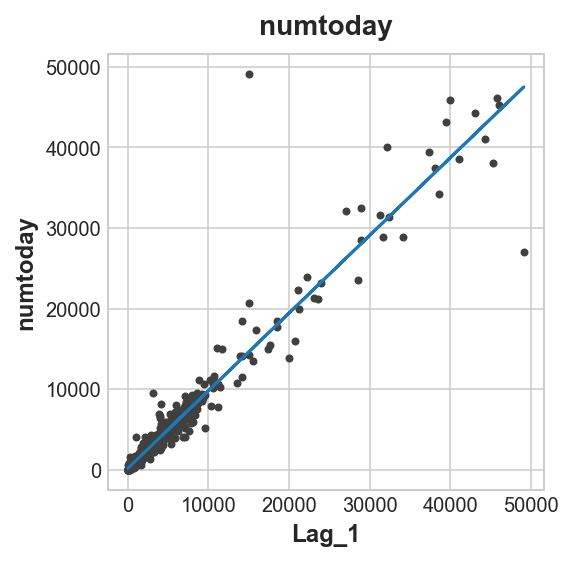

In [11]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('numtoday')
ax.set_xlabel('Lag_1')
ax.set_title('numtoday');

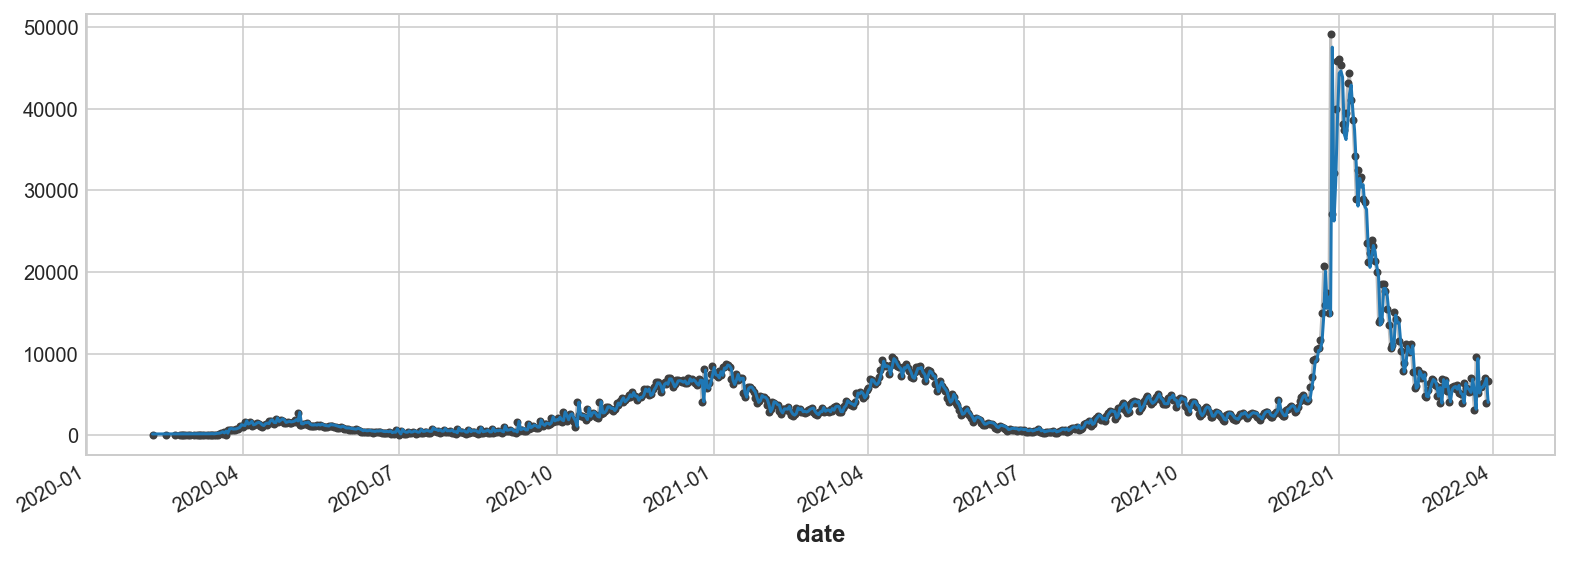

In [12]:
ax = y.plot(**plot_params)
ax = y_pred.plot()